<a href="https://colab.research.google.com/github/ako-precious/Cricket_Stats/blob/main/cricket_precictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the pandas library with the alias 'pd'
import pandas as pd

# Load the newly uploaded dataset
file_path_new = '/content/batting_stats.csv'
batting_data_new = pd.read_csv(file_path_new)

# Check the structure and first few rows of the dataset
batting_data_new.head()

,player_id,match-format,matches,innings,notouts,runs,high_score,average,balls_faced,strike_rate,hundreds,fifties,fours,sixes,catches,stumps,batsman_true
0,14225,First-Class,834,1325,107,61760,316,50.70,1194,73.131444,199,273,76,13,342,0,False
1,22518,First-Class,978,1530,84,58959,305,40.77,1194,73.131444,145,295,76,13,1018,0,False
2,14158,First-Class,833,1300,166,57611,301,50.80,1194,73.131444,170,272,76,13,759,0,False
3,16993,First-Class,814,1340,185,55061,280,47.67,1194,73.131444,153,258,76,13,675,0,False
4,13424,First-Class,870,1478,104,54211,344,39.45,1194,73.131444,124,251,76,13,876,5,True


#### Data cleansing

In [ ]:


# Remove rows with missing values
batting_data_new.dropna(inplace=True)

# Remove duplicate rows
batting_data_new.drop_duplicates(inplace=True)

# Convert 'high_score' to numeric, handling errors by replacing with NaN
batting_data_new['high_score'] = pd.to_numeric(batting_data_new['high_score'], errors='coerce')

# Fill NaN values in 'high_score' with the median
batting_data_new['high_score'].fillna(batting_data_new['high_score'].median(), inplace=True)

# Remove rows where 'runs' or 'balls_faced' are negative or zero
batting_data_new = batting_data_new[(batting_data_new['runs'] > 0) & (batting_data_new['balls_faced'] > 0)]


# Remove outliers for strike rate (assuming it should be within a reasonable range)
batting_data_new = batting_data_new[batting_data_new['strike_rate'] <= 200]




# Print some info to check the cleaning process
print(batting_data_new.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24161 entries, 0 to 24204
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player_id     24161 non-null  int64  
 1   match-format  24161 non-null  object 
 2   matches       24161 non-null  int64  
 3   innings       24161 non-null  int64  
 4   notouts       24161 non-null  int64  
 5   runs          24161 non-null  int64  
 6   high_score    24161 non-null  float64
 7   average       24161 non-null  float64
 8   balls_faced   24161 non-null  int64  
 9   strike_rate   24161 non-null  float64
 10  hundreds      24161 non-null  int64  
 11  fifties       24161 non-null  int64  
 12  fours         24161 non-null  int64  
 13  sixes         24161 non-null  int64  
 14  catches       24161 non-null  int64  
 15  stumps        24161 non-null  int64  
 16  batsman_true  24161 non-null  bool   
dtypes: bool(1), float64(3), int64(12), object(1)
memory usage: 3.2+ MB
None


<ipython-input-2-200c86347395>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  batting_data_new['high_score'].fillna(batting_data_new['high_score'].median(), inplace=True)


#### label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through columns and perform label encoding for categorical and boolean data
for column in batting_data_new.columns:
  if batting_data_new[column].dtype == object or batting_data_new[column].dtype == bool:
    batting_data_new[column] = le.fit_transform(batting_data_new[column])

# Print the updated dataframe
print(batting_data_new.head())

   player_id  match-format  matches  innings  notouts   runs  high_score  \
0      14225             0      834     1325      107  61760       316.0   
1      22518             0      978     1530       84  58959       305.0   
2      14158             0      833     1300      166  57611       301.0   
3      16993             0      814     1340      185  55061       280.0   
4      13424             0      870     1478      104  54211       344.0   

   average  balls_faced  strike_rate  hundreds  fifties  fours  sixes  \
0    50.70         1194    73.131444       199      273     76     13   
1    40.77         1194    73.131444       145      295     76     13   
2    50.80         1194    73.131444       170      272     76     13   
3    47.67         1194    73.131444       153      258     76     13   
4    39.45         1194    73.131444       124      251     76     13   

   catches  stumps  batsman_true  
0      342       0             0  
1     1018       0             0  

In [ ]:
y = batting_data_new['runs']
selected_columns = ['innings', 'balls_faced', 'strike_rate', 'notouts', 'fifties', 'hundreds', 'fours', 'batsman_true', 'high_score', 'sixes']
x = batting_data_new[selected_columns]

print(x.head())
print(y.head())

   innings  balls_faced  strike_rate  notouts  fifties  hundreds  fours  \
0     1325         1194    73.131444      107      273       199     76   
1     1530         1194    73.131444       84      295       145     76   
2     1300         1194    73.131444      166      272       170     76   
3     1340         1194    73.131444      185      258       153     76   
4     1478         1194    73.131444      104      251       124     76   

   batsman_true  high_score  sixes  
0             0       316.0     13  
1             0       305.0     13  
2             0       301.0     13  
3             0       280.0     13  
4             1       344.0     13  
0    61760
1    58959
2    57611
3    55061
4    54211
Name: runs, dtype: int64


In [ ]:
# split the dataset into testing and training sets

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (19328, 10)
X_test shape: (4833, 10)
y_train shape: (19328,)
y_test shape: (4833,)


In [ ]:
# perform feature scaling on the training and testing set

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled contain the scaled feature values.
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (19328, 10)
X_test_scaled shape: (4833, 10)


##  Predicting  the total runs a player might score based on innings, strike rate, and other features.

In [ ]:
# prompt: perform linear regression, Gradient Boosting Machines (GBM), Support Vector Machines (SVM): and  Neural Networks (Deep Learning) on  training  sets

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_y_pred = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
print("Linear Regression:")
print("Mean Squared Error:", lr_mse)
print("R-squared:", lr_r2)

# Gradient Boosting Machines (GBM)
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train_scaled, y_train)
gbm_y_pred = gbm_model.predict(X_test_scaled)
gbm_mse = mean_squared_error(y_test, gbm_y_pred)
gbm_r2 = r2_score(y_test, gbm_y_pred)
print("\nGradient Boosting Machines (GBM):")
print("Mean Squared Error:", gbm_mse)
print("R-squared:", gbm_r2)

# Support Vector Machines (SVM)
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)
svm_y_pred = svm_model.predict(X_test_scaled)
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_r2 = r2_score(y_test, svm_y_pred)
print("\nSupport Vector Machines (SVM):")
print("Mean Squared Error:", svm_mse)
print("R-squared:", svm_r2)

# Neural Networks (Deep Learning)
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
nn_model.fit(X_train_scaled, y_train)
nn_y_pred = nn_model.predict(X_test_scaled)
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)
print("\nNeural Networks (Deep Learning):")
print("Mean Squared Error:", nn_mse)
print("R-squared:", nn_r2)

Linear Regression:
Mean Squared Error: 53950.48904541683
R-squared: 0.9956829243098264

Gradient Boosting Machines (GBM):
Mean Squared Error: 45980.8377121129
R-squared: 0.9963206495397349

Support Vector Machines (SVM):
Mean Squared Error: 10459124.173748929
R-squared: 0.16306911188537998

Neural Networks (Deep Learning):
Mean Squared Error: 33055.50710340758
R-squared: 0.9973549243265922


In [ ]:
# prompt: compare the models and select the best one

# Create a dictionary to store the model performance metrics
model_results = {
    "Linear Regression": {"MSE": lr_mse, "R-squared": lr_r2},
    "Gradient Boosting Machines": {"MSE": gbm_mse, "R-squared": gbm_r2},
    "Support Vector Machines": {"MSE": svm_mse, "R-squared": svm_r2},
    "Neural Networks": {"MSE": nn_mse, "R-squared": nn_r2},
}

# Find the model with the lowest MSE (best performance)
best_model = min(model_results, key=lambda k: model_results[k]["MSE"])

print("\nModel Comparison Results:")
for model, metrics in model_results.items():
  print(f"{model}: MSE = {metrics['MSE']:.2f}, R-squared = {metrics['R-squared']:.2f}")

print(f"\nThe best performing model based on MSE is: {best_model}")



Model Comparison Results:
Linear Regression: MSE = 53950.49, R-squared = 1.00
Gradient Boosting Machines: MSE = 45980.84, R-squared = 1.00
Support Vector Machines: MSE = 10459124.17, R-squared = 0.16
Neural Networks: MSE = 33055.51, R-squared = 1.00

The best performing model based on MSE is: Neural Networks


Mean Squared Error: 45980.8377121129
R-squared: 0.9963206495397349


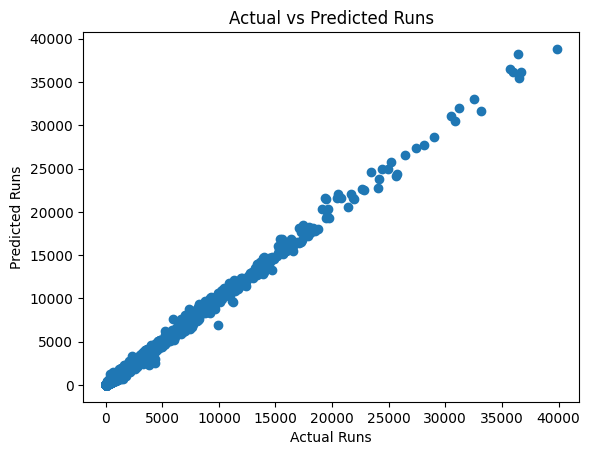

In [ ]:
# prompt: Make Predictions on the Test Set:
# After the model is trained, use the test set to make predictions and evaluate its performance.

# Assuming you have already trained your model (e.g., gbm_model)

# Make predictions on the test set
gbm_y_pred = gbm_model.predict(X_test_scaled)  # Replace gbm_model with your chosen model

# Evaluate the model's performance
mse = mean_squared_error(y_test, gbm_y_pred)
r2 = r2_score(y_test, gbm_y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

import matplotlib.pyplot as plt

plt.scatter(y_test, gbm_y_pred)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs Predicted Runs')
plt.show()


Mean Squared Error: 10459124.173748929
R-squared: 0.16306911188537998


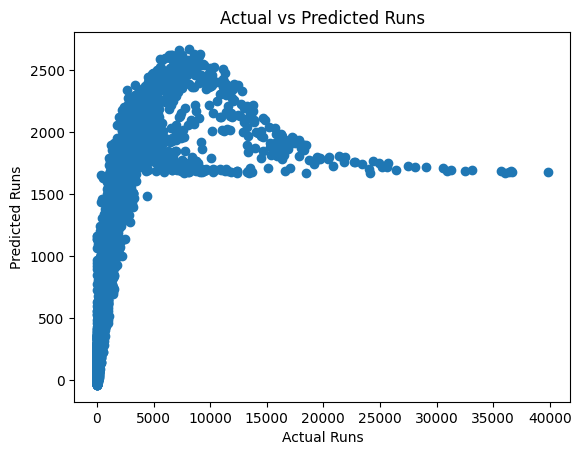

In [ ]:

# prompt: Make Predictions on the Test Set:
# After the model is trained, use the test set to make predictions and evaluate its performance.

# Assuming you have already trained your model (e.g., gbm_model)

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test_scaled)  # Replace gbm_model with your chosen model

# Evaluate the model's performance
mse = mean_squared_error(y_test, svm_y_pred)
r2 = r2_score(y_test, svm_y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


import matplotlib.pyplot as plt

plt.scatter(y_test, svm_y_pred)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs Predicted Runs')
plt.show()


Mean Squared Error: 53950.48904541683
R-squared: 0.9956829243098264


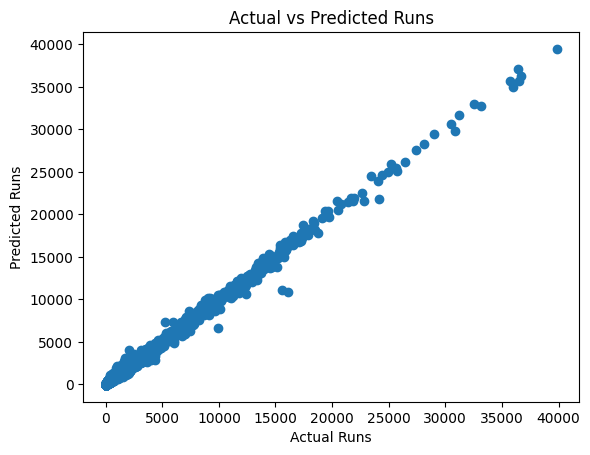

In [ ]:

# prompt: Make Predictions on the Test Set:
# After the model is trained, use the test set to make predictions and evaluate its performance.

# Assuming you have already trained your model (e.g., gbm_model)

# Make predictions on the test set
lr_y_pred = lr_model.predict(X_test_scaled)  # Replace gbm_model with your chosen model

# Evaluate the model's performance
mse = mean_squared_error(y_test, lr_y_pred)
r2 = r2_score(y_test, lr_y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


import matplotlib.pyplot as plt

plt.scatter(y_test, lr_y_pred)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs Predicted Runs')
plt.show()


Mean Squared Error: 45980.8377121129
R-squared: 0.9963206495397349


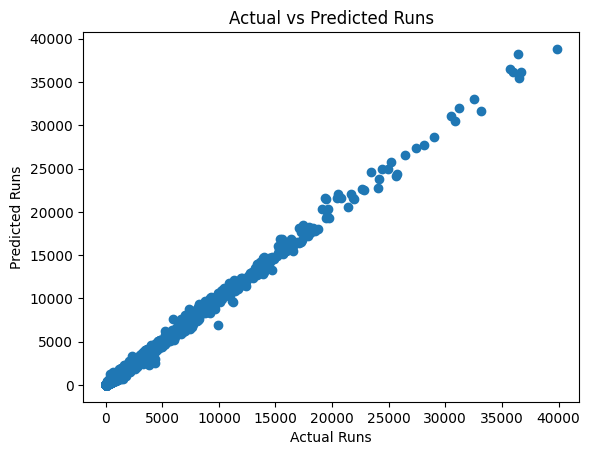

In [ ]:

# prompt: Make Predictions on the Test Set:
# After the model is trained, use the test set to make predictions and evaluate its performance.

# Assuming you have already trained your model (e.g., gbm_model)

# Make predictions on the test set
lr_y_pred = gbm_model.predict(X_test_scaled)  # Replace gbm_model with your chosen model

# Evaluate the model's performance
mse = mean_squared_error(y_test, lr_y_pred)
r2 = r2_score(y_test, lr_y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


import matplotlib.pyplot as plt

plt.scatter(y_test, lr_y_pred)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs Predicted Runs')
plt.show()


Mean Squared Error: 33055.50710340758
R-squared: 0.9973549243265922


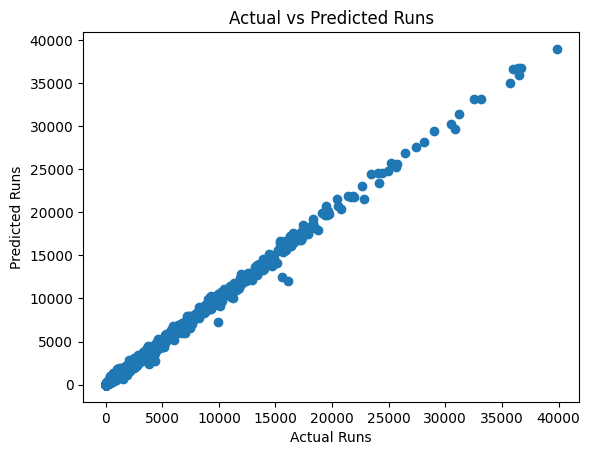

In [ ]:

# prompt: Make Predictions on the Test Set:
# After the model is trained, use the test set to make predictions and evaluate its performance.

# Assuming you have already trained your model (e.g., gbm_model)

# Make predictions on the test set
nn_y_pred = nn_model.predict(X_test_scaled)  # Replace gbm_model with your chosen model

# Evaluate the model's performance
mse = mean_squared_error(y_test, nn_y_pred)
r2 = r2_score(y_test, nn_y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


import matplotlib.pyplot as plt

plt.scatter(y_test, nn_y_pred)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs Predicted Runs')
plt.show()


In [ ]:
import joblib

# Assuming 'model' is the trained model
joblib.dump(nn_model, 'batting_runs_model.pkl')


['batting_runs_model.pkl']